Original Dataset:                 Name  Roll_no     Class  CGPA     IQ  Age
0       Pooja Joshi        1       BIM  3.20   78.8   18
1   Bhawana Koirala        2  BSc CSIT  2.94   93.7   17
2     Hari Maharjan        3  BSc CSIT  3.26   94.9   24
3    Sanjana Khadka        4       BCA  3.61   88.0   17
4   Rajesh Shrestha        5       BCA  2.91   97.6   25
..              ...      ...       ...   ...    ...  ...
95     Kiran Balami       96       BIT  2.41  105.8   18
96     Manoj Subedi       97  BSc CSIT  3.12   86.7   17
97     Binod Dhakal       98  BSc CSIT  3.10  102.3   20
98   Roshan Koirala       99       BIT  3.00  100.9   24
99    Krishna Magar      100  BSc CSIT  2.91   82.9   18

[100 rows x 6 columns]

Detected Outliers (Z > 3):
               Name  Roll_no Class  CGPA     IQ  Age  CGPA_ZScore  IQ_ZScore
10    Saugat Kattel       11   BIM  4.50   71.2   25     3.353631        NaN
79  Manoj Chaudhary       80   BCA  0.50  140.8   20    -5.348058        NaN
5    Sita Bhat

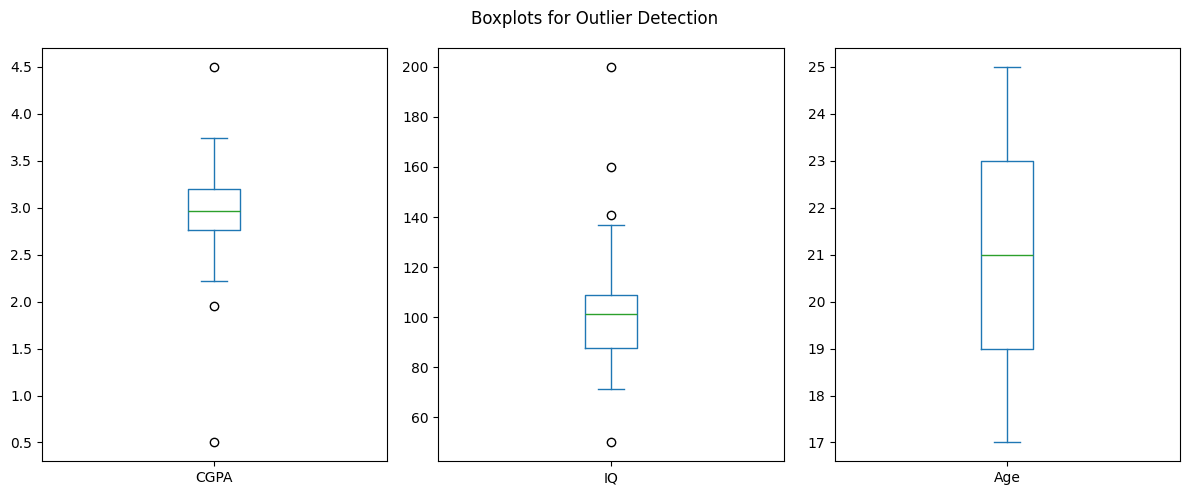

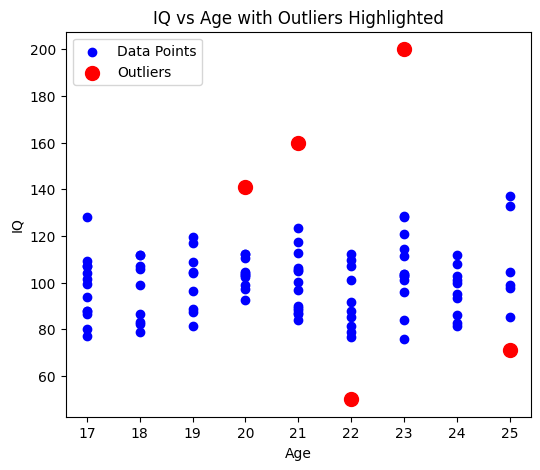

In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


try:
    data = pd.read_csv(r"sample_data\nepali_students_dataset.csv")
    df = pd.DataFrame(data)

except Exception as e:
    print("Error while loading data:", e)
    exit()

print("Original Dataset: ", df)


numeric_cols = ["CGPA", "IQ", "Age"]

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors="coerce")


data = data.dropna(subset=numeric_cols)


threshold = 2.3
outliers = pd.DataFrame()


try:
    for col in numeric_cols:
        mean = data[col].mean()
        std = data[col].std()
        data[col + "_ZScore"] = (data[col] - mean) / std
        

        col_outliers = data[data[col + "_ZScore"].abs() > threshold]
        if not col_outliers.empty:
            outliers = pd.concat([outliers, col_outliers])

    outliers = outliers.drop_duplicates()
    
except Exception as ex:
    print("Exception DUring Outlier Detection : ",ex)




print("\nDetected Outliers (Z > 3):")
print(outliers if not outliers.empty else "None")


data_clean = data.drop(outliers.index)

print("\nDataset After Outlier Removal:")
print(data_clean)

try:
    df[numeric_cols].plot(kind='box', subplots=True, layout=(1,3), figsize=(12,5), title="Boxplots for Outlier Detection")
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(6,5))
    plt.scatter(df["Age"], df["IQ"], c="blue", label="Data Points")
    if not outliers.empty:
        plt.scatter(outliers["Age"], outliers["IQ"], c="red", s=100, label="Outliers")
    plt.xlabel("Age")
    plt.ylabel("IQ")
    plt.title("IQ vs Age with Outliers Highlighted")
    plt.legend()
    plt.show()

except Exception as ex:
    print("Error during visualization:", e)
